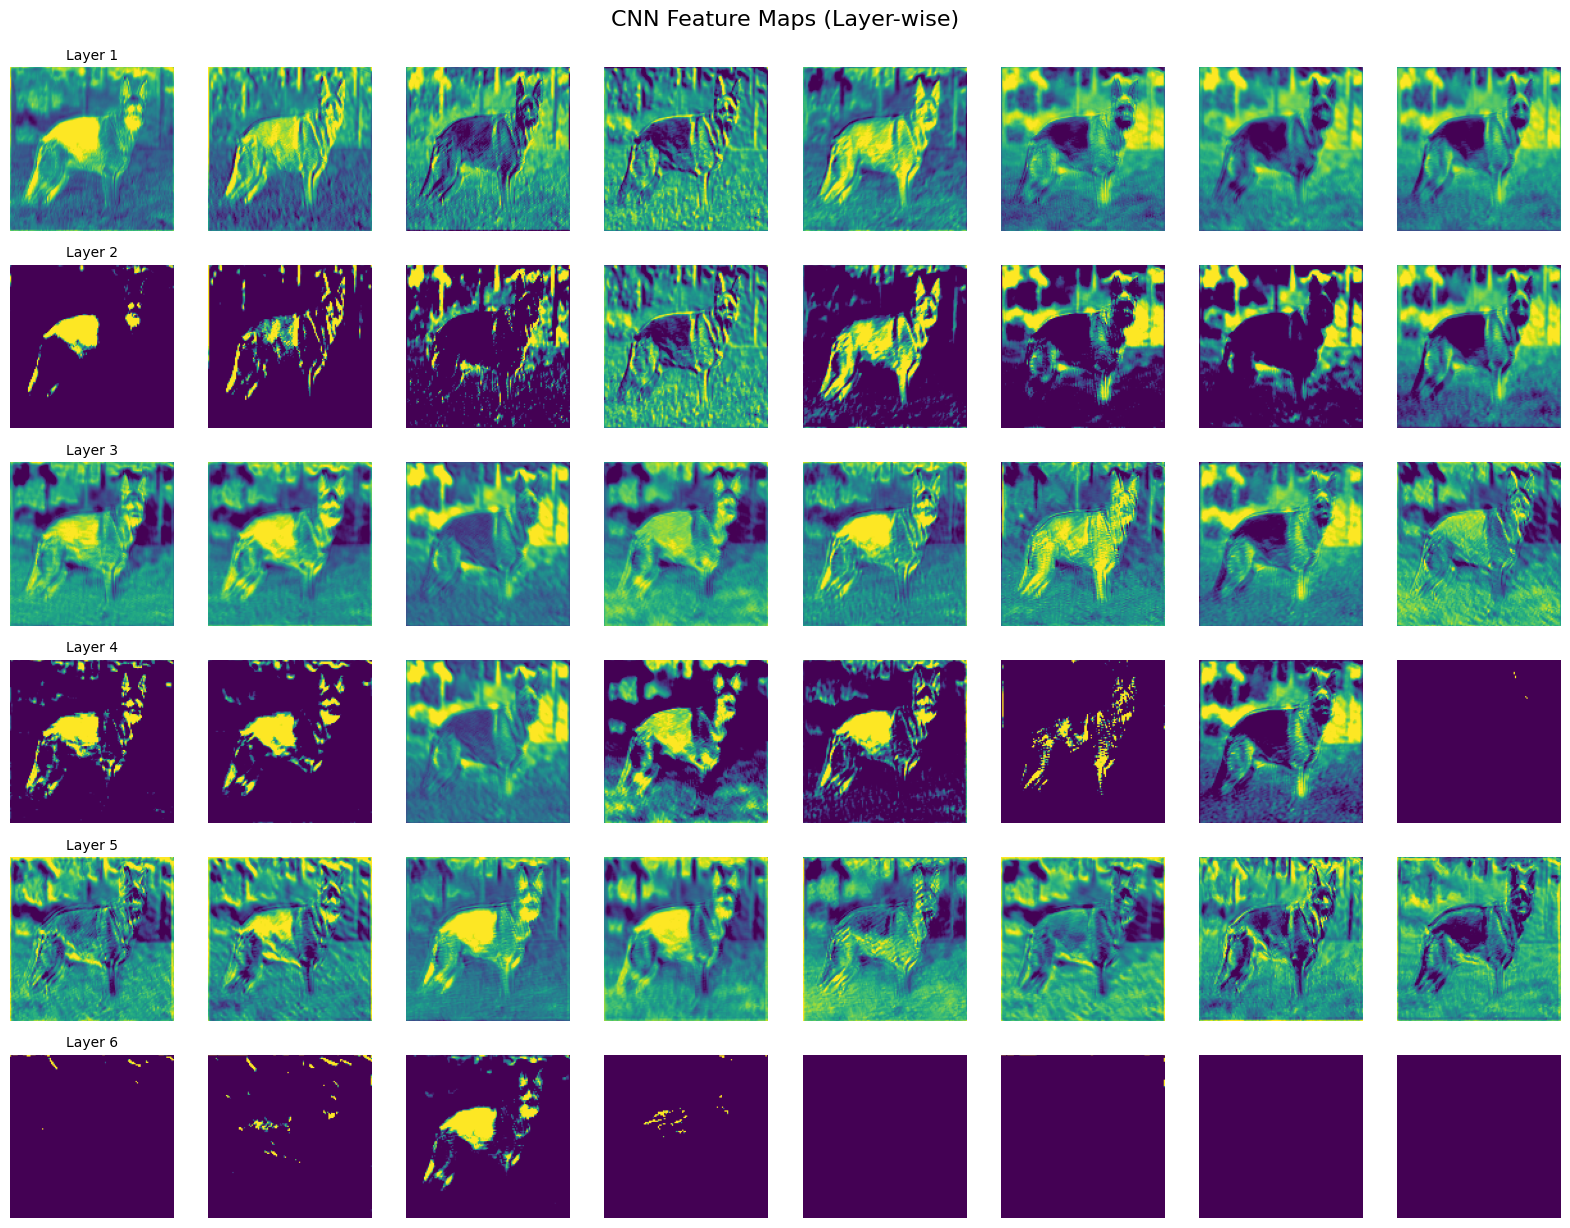

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# ---------------------
# 1. Load and preprocess image
# ---------------------

image_path = 'dog.jpg'  # Change this to your image path

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# ---------------------
# 2. Define CNN model
# ---------------------

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()

    def forward(self, x):
        activations = []

        x = self.conv1(x)
        activations.append(x.clone())
        x = self.relu1(x)
        activations.append(x.clone())

        x = self.conv2(x)
        activations.append(x.clone())
        x = self.relu2(x)
        activations.append(x.clone())

        x = self.conv3(x)
        activations.append(x.clone())
        x = self.relu3(x)
        activations.append(x.clone())

        return activations

model = SimpleCNN()

# ---------------------
# 3. Forward pass and collect activations
# ---------------------

with torch.no_grad():
    activations = model(input_tensor)

# ---------------------
# 4. Plot all activations in a single image
# ---------------------

def plot_all_activations(activations, col_limit=8):
    plt.figure(figsize=(col_limit * 2, len(activations) * 2))
    for layer_idx, activation in enumerate(activations):
        num_filters = min(col_limit, activation.shape[1])
        for i in range(num_filters):
            ax = plt.subplot(len(activations), col_limit, layer_idx * col_limit + i + 1)
            fmap = activation[0, i, :, :].cpu().numpy()

            # Normalize for better visualization
            fmap -= fmap.mean()
            fmap /= (fmap.std() + 1e-5)
            fmap = np.clip((fmap * 64 + 128), 0, 255).astype(np.uint8)

            plt.imshow(fmap, cmap='viridis')
            plt.axis('off')
            if i == 0:
                ax.set_title(f'Layer {layer_idx+1}', fontsize=10)
    plt.tight_layout()
    plt.suptitle("CNN Feature Maps (Layer-wise)", fontsize=16, y=1.02)
    plt.show()

plot_all_activations(activations)
